# Анализ рынка видеоигр

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Импортируем библиотеки и открываем файл с данными

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('datasets/games.csv')

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропущенные значения в столбцах name, year_of_release, genre, critic_score, user_score, rating

Просматриваем таблицу по столбцам на содержимое

In [7]:
for col in df.columns:
    print(str(col))
    display(df[col].value_counts())

Name


Need for Speed: Most Wanted               12
FIFA 14                                    9
Ratatouille                                9
Madden NFL 07                              9
LEGO Marvel Super Heroes                   9
                                          ..
Momotaro Douchuuki                         1
Battlefield 2                              1
The Cheetah Girls: Pop Star Sensations     1
Tenjin Ranman: Happy GO Lucky!!            1
The Lost World: Jurassic Park              1
Name: Name, Length: 11559, dtype: int64

Platform


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Year_of_Release


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Genre


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

NA_sales


0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: NA_sales, Length: 402, dtype: int64

EU_sales


0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: EU_sales, Length: 307, dtype: int64

JP_sales


0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: JP_sales, Length: 244, dtype: int64

Other_sales


0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: Other_sales, Length: 155, dtype: int64

Critic_Score


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

User_Score


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Rating


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

## Переработка данных

Приводим название столбцов к нижниму регистру

In [13]:
df.columns = df.columns.str.lower()

Проверим на дубликаты

In [9]:
df.duplicated().sum()

0

Заменяем тип данных в столбцах с годом релиза и оценкой критиков на целочисленный.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [11]:
df['critic_score'] = df['critic_score'].astype('Int64')

Отбросим значения по играм без названия

In [14]:
df[df['name'].isna()== True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [15]:
df.dropna(subset = ['name'],  inplace = True)

In [16]:
df = df.reset_index(drop = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Заполним пустые значения рейтинга на "no rating", так как присвоит категориальное значение самостоятельно мы не можем.

In [18]:
df['rating'] = df['rating'].fillna('no rating')

Посчитаем общие продажи игр и сохраним результат в столбец total_sales

In [20]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(2), float64(5), object(5)
memory usage: 1.6+ MB


In [22]:
df.query('name =="Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,no rating,2.81
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
1997,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T,1.04
2047,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,no rating,1.01
3580,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T,0.56
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
6272,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,no rating,0.27
6409,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E,0.27


На примере одной игры видим что рейтинг, оценки игроков и критиков могут быть разные, поэтому достоверно заполнить пропуски не представляется возможным. Следовательно пропуски в этих столбцах оставляем.

## Проведите исследовательский анализ данных

### Посмотрим сколько было релизов  и продаж игр по годам

Составим сводную таблицу где запишем кол-во релизов и кол-во продаж игр по годам

In [23]:
years =  df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = ['count', 'sum']).reset_index()

In [24]:
years.columns = ['year_of_release', 'games_count', 'total_sales']

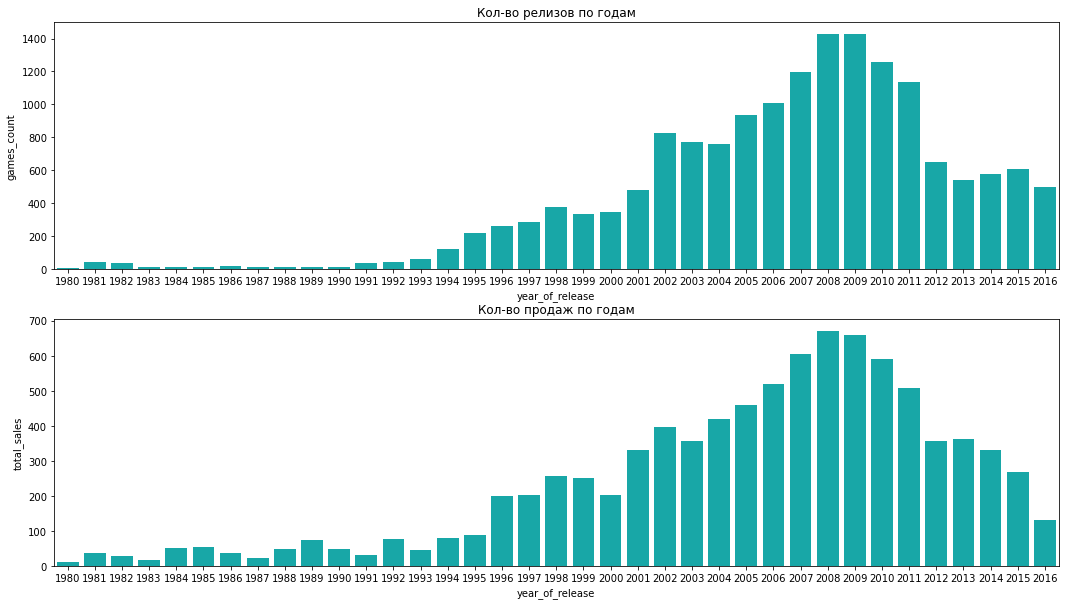

In [29]:
fig = plt.figure(figsize=(18,10))

plt.subplot(2, 1, 1)
plt.title('Кол-во релизов по годам')
sns.barplot(x='year_of_release',y='games_count',data=years, color="c")

plt.subplot(2, 1, 2)
plt.title('Кол-во продаж по годам')
sns.barplot(x='year_of_release',y='total_sales',data=years, color="c")
plt.show()


In [34]:
years

,year_of_release,games_count,total_sales
0,1980,9,11.38
1,1981,46,35.68
2,1982,36,28.88
3,1983,17,16.80
4,1984,14,50.35
5,1985,14,53.95
6,1986,21,37.08
7,1987,16,21.70
8,1988,15,47.21
9,1989,17,73.45


Видим что кол-во продаж соотноситься с кол-вом релизов. Пик приходится на 2008, 2009 год после чего мы наблюдаем спад на обоих графиках

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Составим сводню таблицу по годам и платформам чтобы посмотреть их продажи в отдельности.

In [35]:
platform =  df.pivot_table(index = ['year_of_release','platform'], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False).reset_index()

In [36]:
platform.columns = ['year_of_release', 'platform', 'total_sales']

In [37]:
platform

,year_of_release,platform,total_sales
0,2004,PS2,211.81
1,2009,Wii,206.97
2,2002,PS2,205.38
3,2003,PS2,184.31
4,2008,Wii,171.32
...,...,...,...
233,1996,PCFX,0.03
234,1988,PC,0.03
235,1985,DS,0.02
236,1994,3DO,0.02


In [38]:
plat_sales = platform.groupby(['platform','year_of_release']).sum().sort_values('total_sales', ascending = False).head(12).reset_index()

In [39]:
plat_sales

,platform,year_of_release,total_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


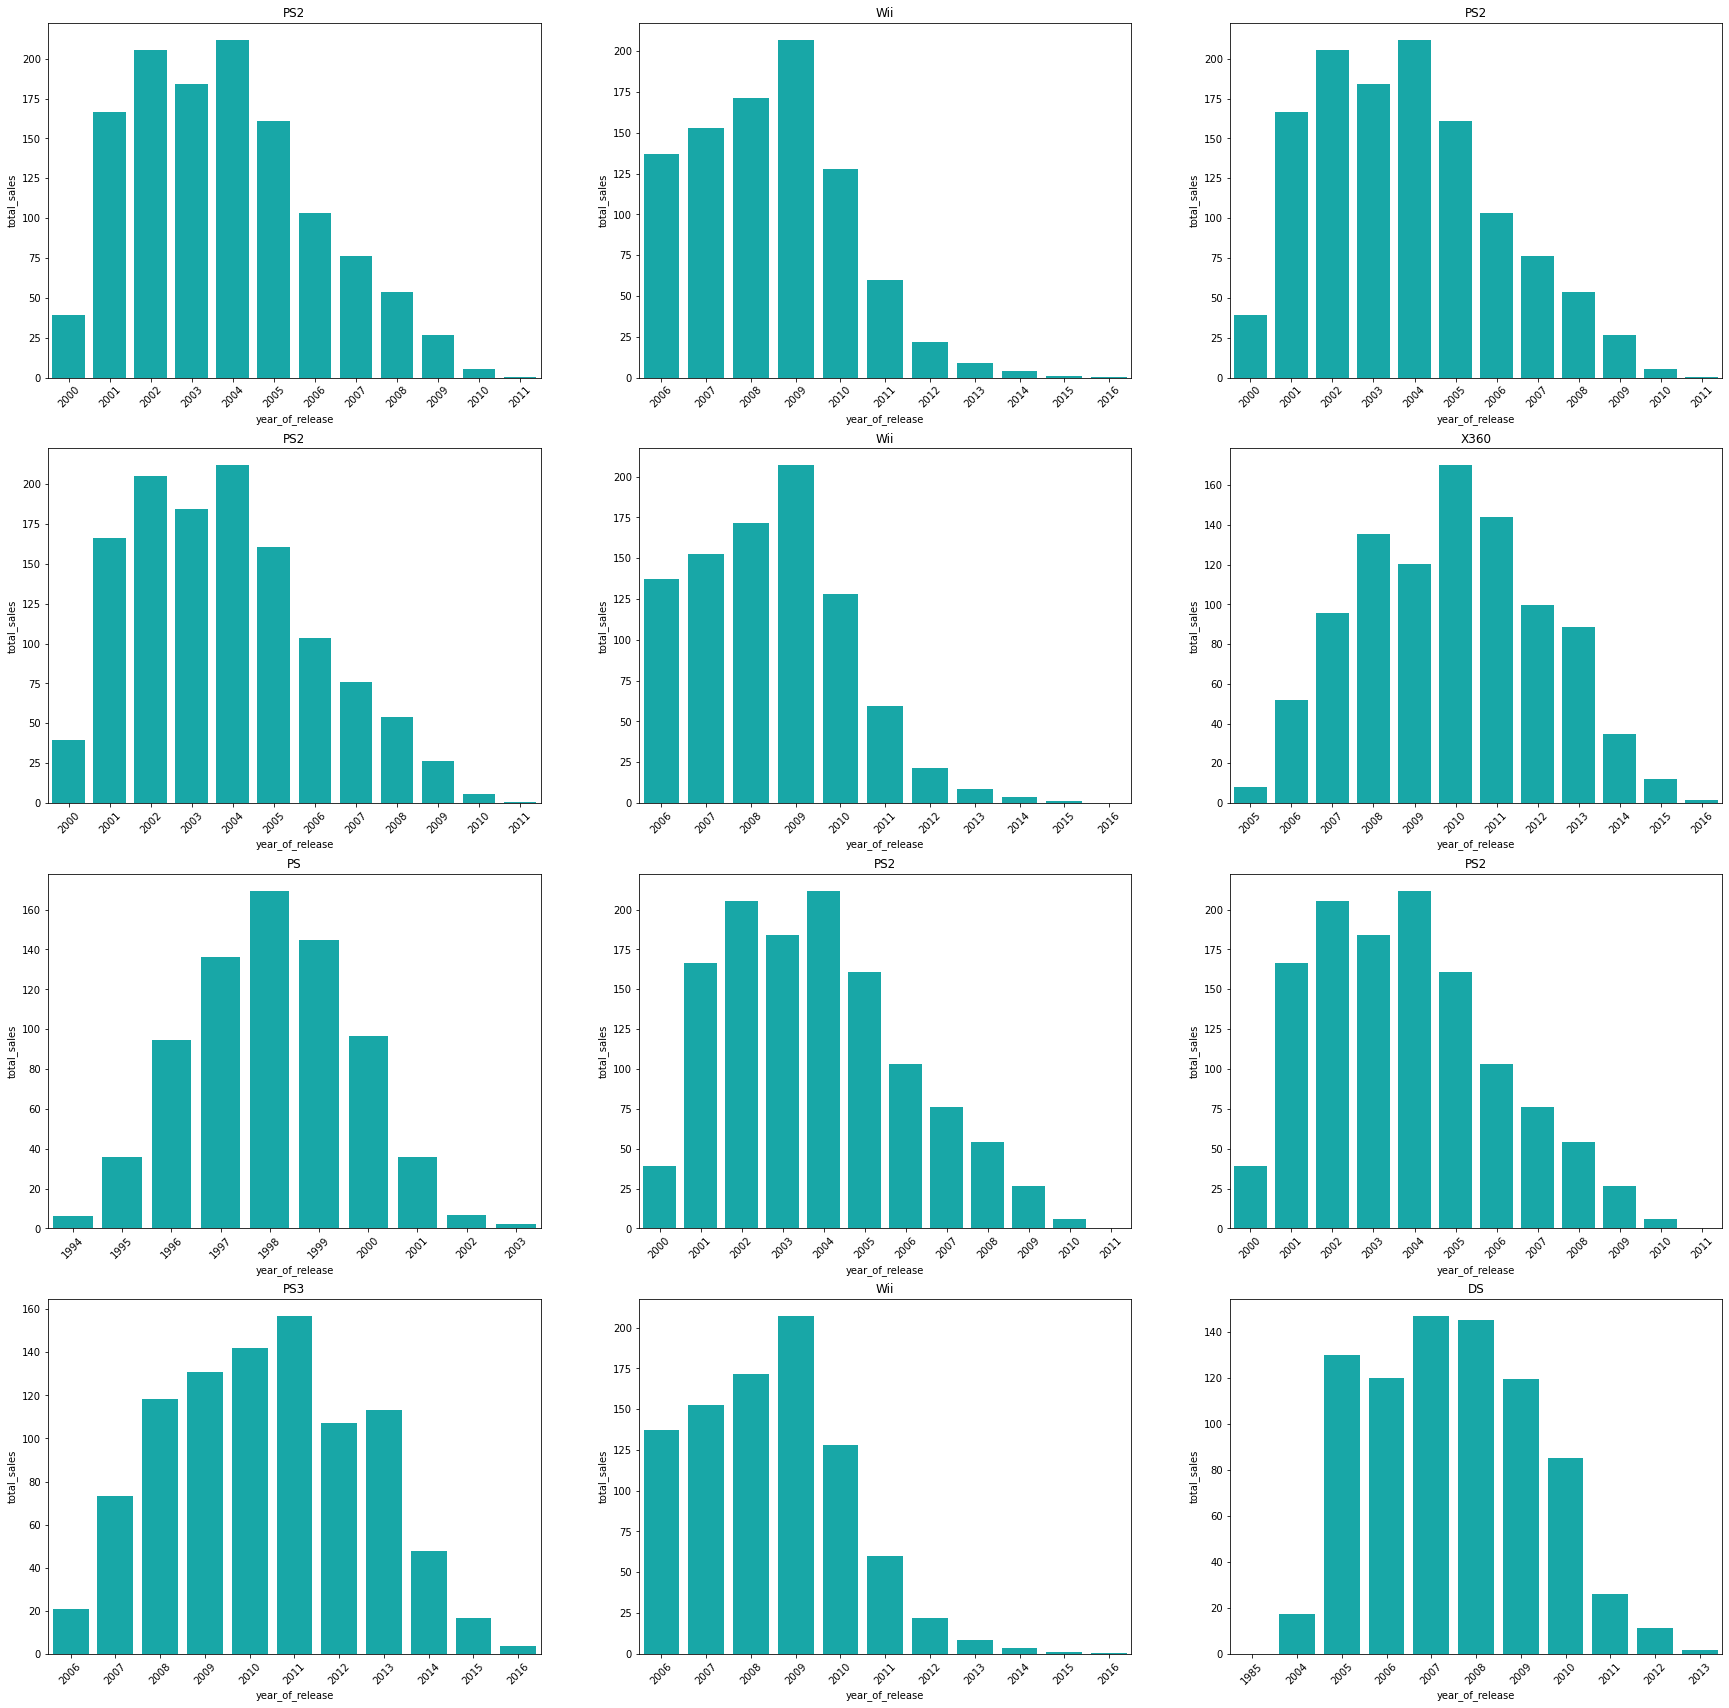

In [40]:
fig = plt.figure(figsize=(30,30))
for n in range(12):
    x = plat_sales.loc[n, 'platform']
    plt.subplot(4, 3, n+1)
    g = sns.barplot(x='year_of_release',y='total_sales',data = platform.query('platform == @x'), color="c")
    plt.setp(g.get_xticklabels(), rotation=45)
    plt.title(x)

Смотря на графики можно сделать вывод, что для современных консолей цикл составляет 6-7 лет. Поэтому заключаем что несмотря на хорошие продажи консоли XBOX360 и PS3 завершили свой цикл и сменились новым поколением. Актуальный период для анализа возьмем с 2013 года(выход консолей нового поколения)

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [41]:
actual_platform = platform.query('year_of_release >= 2013').groupby(['platform','year_of_release']).sum().sort_values('total_sales', ascending = False).head(9).reset_index()

In [42]:
actual_platform

,platform,year_of_release,total_sales
0,PS4,2015,118.90
1,PS3,2013,113.25
2,PS4,2014,100.00
3,X360,2013,88.58
4,PS4,2016,69.25
5,XOne,2015,60.14
6,3DS,2013,56.57
7,XOne,2014,54.07
8,PS3,2014,47.76


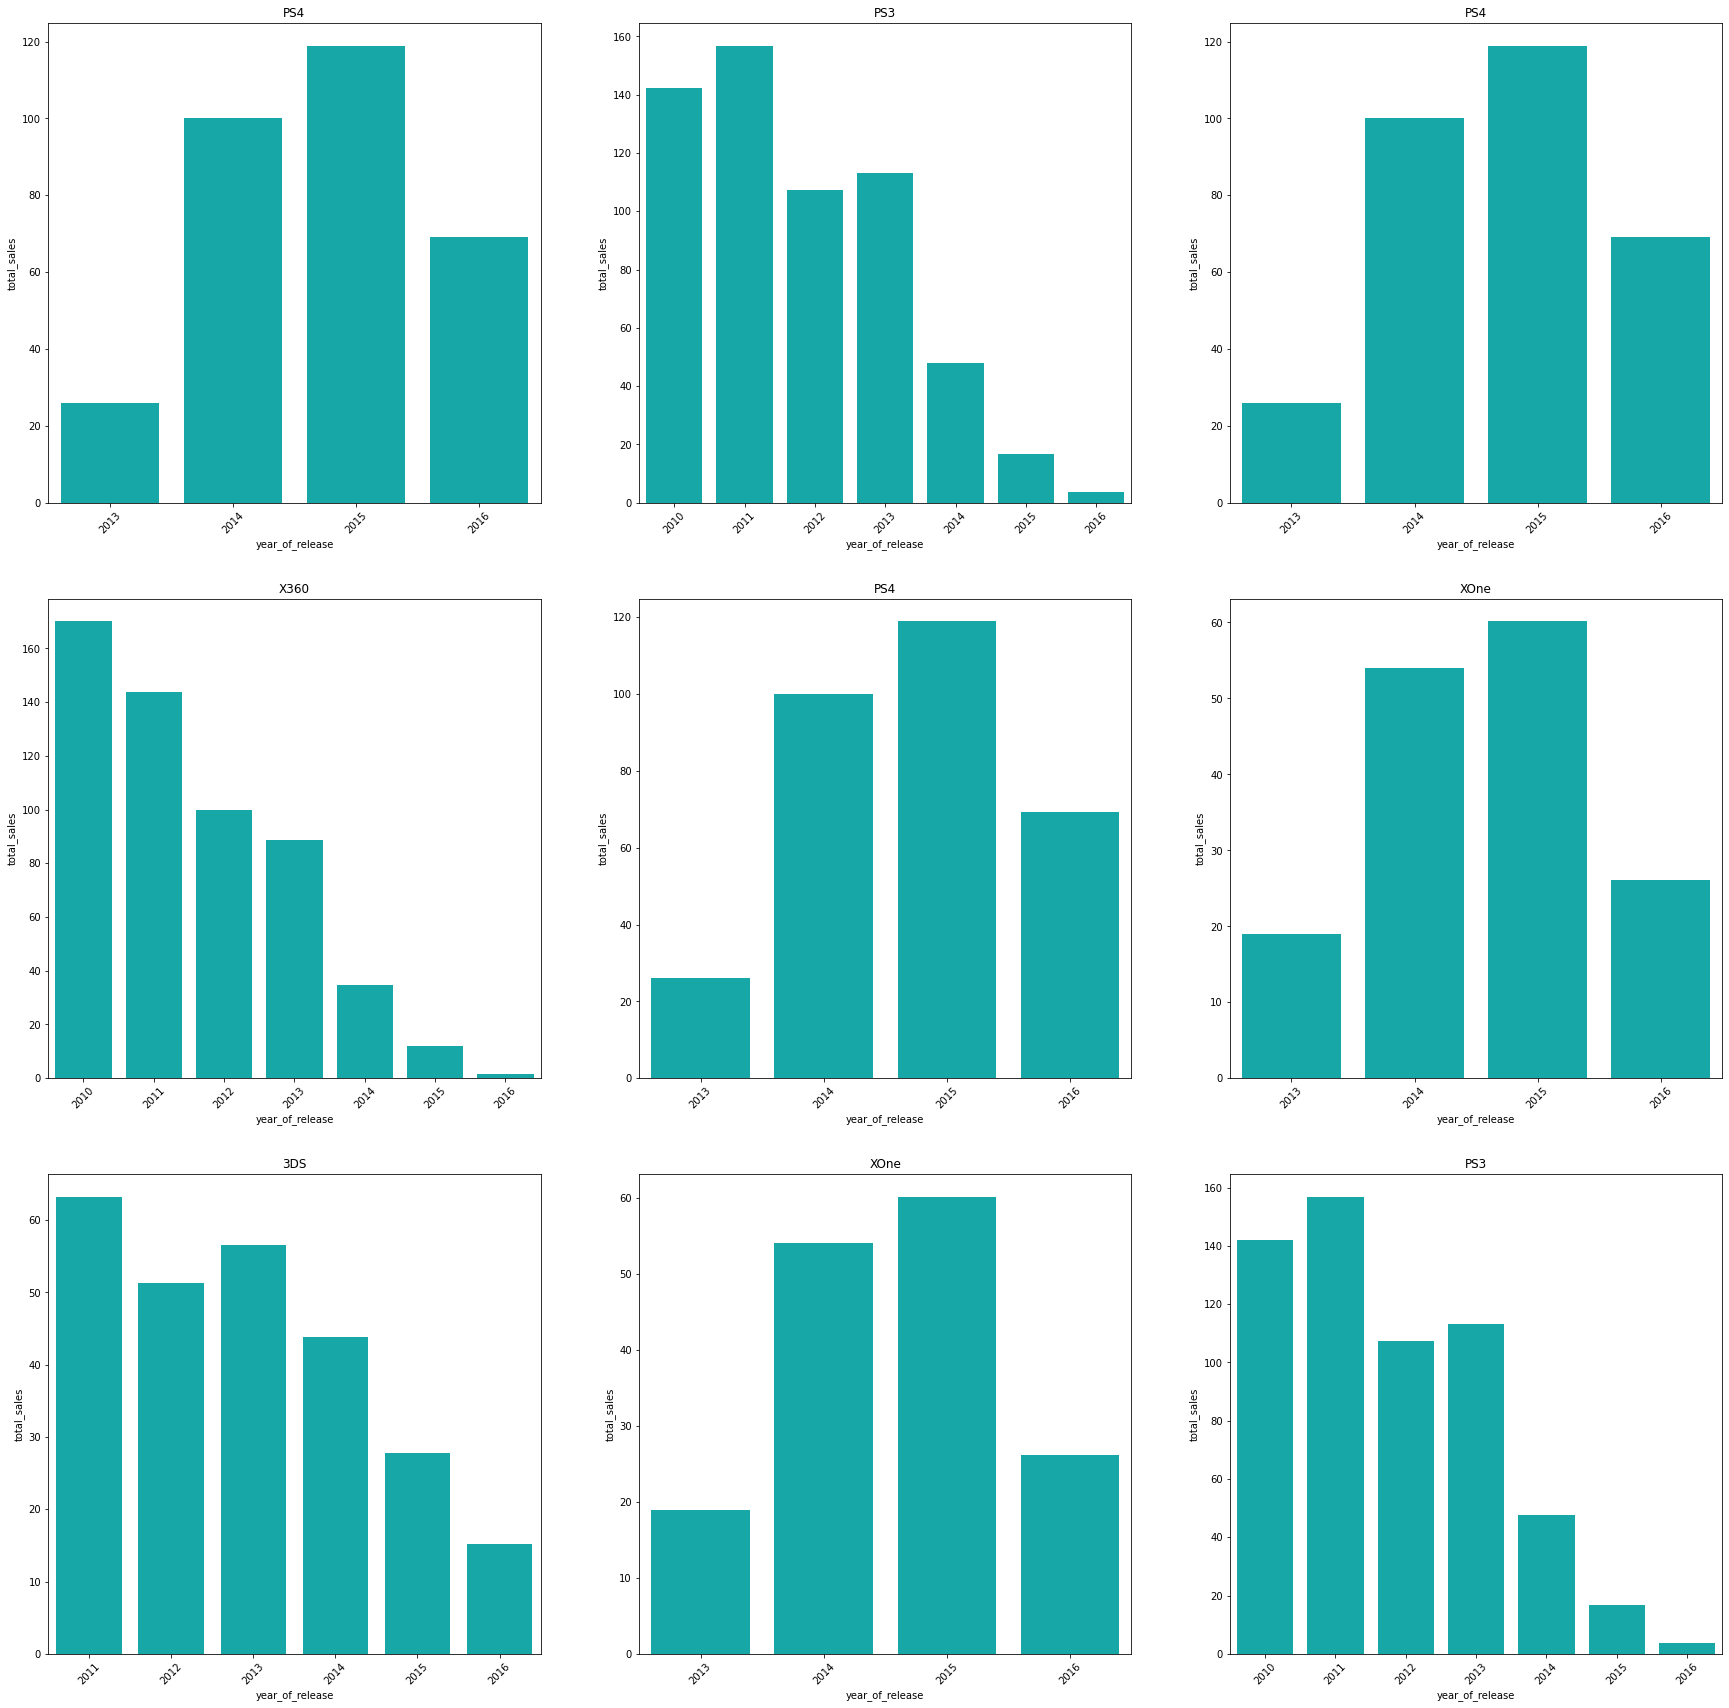

In [43]:
fig = plt.figure(figsize=(30,30))
for n in range(len(actual_platform)):
    x = actual_platform.loc[n, 'platform']
    plt.subplot(3, 3, n+1)
    g = sns.barplot(x='year_of_release',y='total_sales',data = platform.query('platform == @x and year_of_release >= 2010'), color="c")
    plt.setp(g.get_xticklabels(), rotation=45)
    plt.title(x)

Анализируя актуальный период отмечаем тот факт что за 2016 год наблюдается спад даже у свежих консолей. Отчетливо видна разница спроса на игры для платформ PS3, XBOX360 по сравнению с прошлыми годами. Так же видим околонулевые продажи игр для платформы Wii. 

Для определения актуальных платформ, посмотрим на суммарные продажи игр по платформам за последние 2 года

In [44]:
actual_platform_2015 = platform.query('year_of_release == 2015').groupby(['platform']).sum().sort_values('total_sales', ascending = False).head(9).reset_index()

In [45]:
actual_platform_2015

,platform,year_of_release,total_sales
0,PS4,2015,118.90
1,XOne,2015,60.14
2,3DS,2015,27.78
3,PS3,2015,16.82
4,WiiU,2015,16.35
5,X360,2015,11.96
6,PC,2015,8.52
7,PSV,2015,6.25
8,Wii,2015,1.14


In [46]:
actual_platform_2016 = platform.query('year_of_release == 2016').groupby(['platform']).sum().sort_values('total_sales', ascending = False).head(9).reset_index()

In [47]:
actual_platform_2016

,platform,year_of_release,total_sales
0,PS4,2016,69.25
1,XOne,2016,26.15
2,3DS,2016,15.14
3,PC,2016,5.25
4,WiiU,2016,4.60
5,PSV,2016,4.25
6,PS3,2016,3.60
7,X360,2016,1.52
8,Wii,2016,0.18


PS3, XBOX360 показали слишком резкое снижение спроса, перспективными платформами их точно не назвать.

In [48]:
good_pl = actual_platform_2016['platform'].head(6)

In [49]:
good_pl

0     PS4
1    XOne
2     3DS
3      PC
4    WiiU
5     PSV
Name: platform, dtype: object

Не стоит забывать что при цикле 6-7 лет платформы 3DS, WiiU, PSV доживают свое.

Сохраним актуальные данные в отдельный датасет

In [52]:
actual_df = df[(df['platform'].isin(good_pl))&(df['year_of_release']>=2013)]

Пользовательский рейтинг tbd означает что рейтинг определяется, тк эти значения мы заполнить самостоятельно не можем, для дальнейшего анлиза заменим эти значение на NaN

In [53]:
actual_df['user_score'] = actual_df['user_score'].replace('tbd', np.nan)

In [54]:
actual_df['user_score'] = actual_df['user_score'].astype('float64')

In [58]:
actual_df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16650,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
16421,Cities: Skylines Snowfall,PC,2016,Simulation,0.00,0.01,0.00,0.00,72,7.1,no rating,0.01
16583,Farming 2017 - The Simulation,PS4,2016,Simulation,0.00,0.01,0.00,0.00,<NA>,NaN,no rating,0.01
16385,Durarara!! Relay,PSV,2015,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no rating,0.01
16037,Grisaia no Meikyuu: Le Labyrinthe de la Grisaia,PSV,2014,Adventure,0.00,0.00,0.02,0.00,<NA>,NaN,no rating,0.02
16156,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.00,<NA>,NaN,no rating,0.01
7382,Assassin's Creed Syndicate,PC,2015,Action,0.11,0.09,0.00,0.02,74,5.9,M,0.22
16050,Girl Friend Beta: Kimi to Sugosu Natsuyasumi,PSV,2015,Action,0.00,0.00,0.02,0.00,<NA>,NaN,no rating,0.02
7818,Dynasty Warriors 8: Empires,PS4,2014,Action,0.06,0.07,0.03,0.03,63,7.5,T,0.19
16506,Ride 2,XOne,2016,Racing,0.00,0.01,0.00,0.00,<NA>,8.2,E,0.01


### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Платформы')

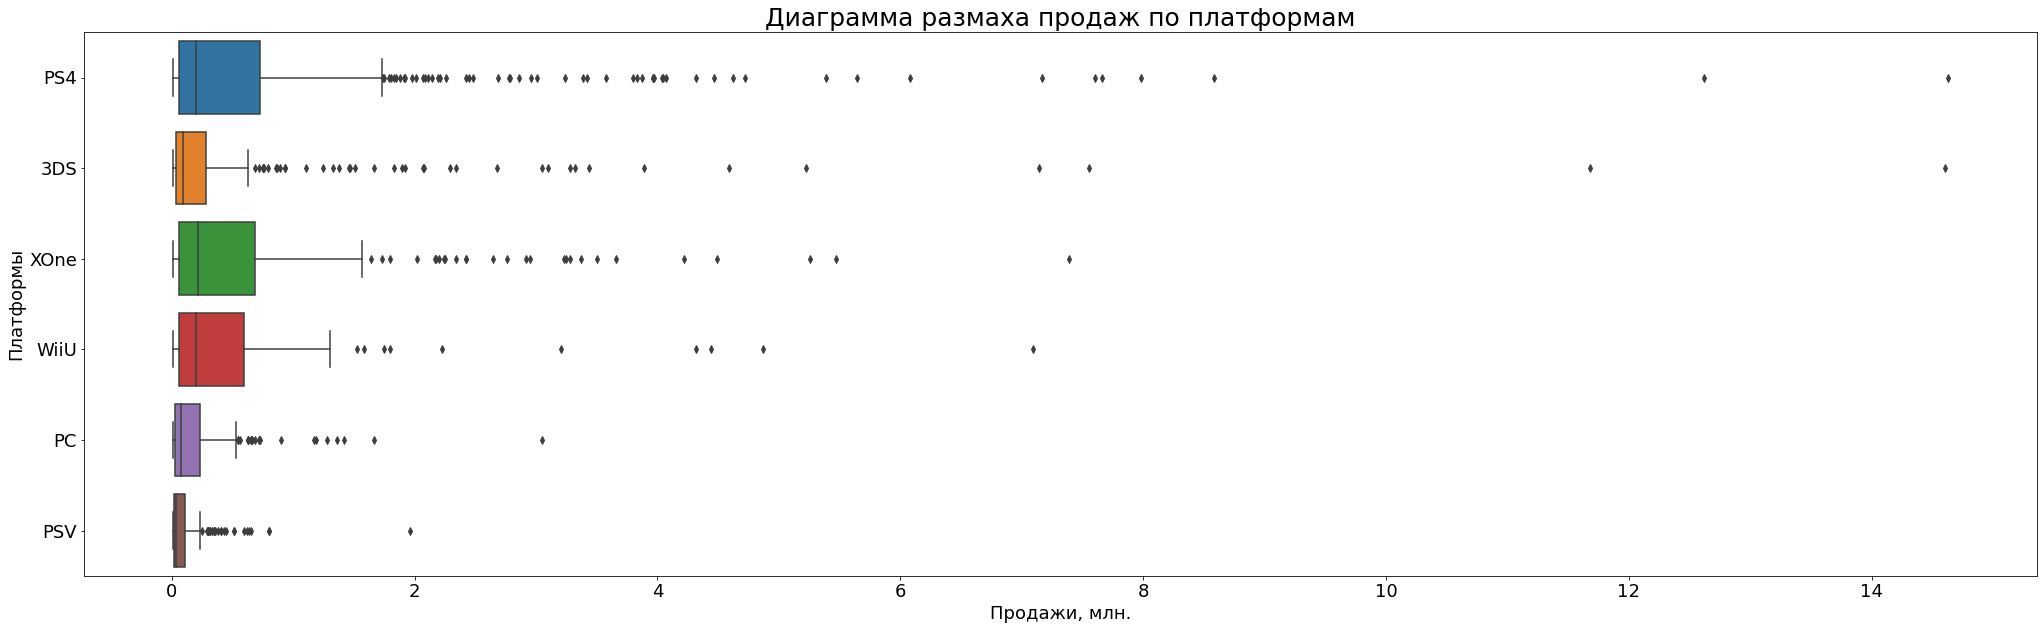

In [59]:
fig = plt.figure(figsize=(35,10))
ax = fig.add_subplot()
sns.boxplot(x="total_sales", y="platform", data = actual_df)
plt.title('Диаграмма размаха продаж по платформам', fontsize=25)
ax.tick_params(labelsize=18)
plt.xlabel('Продажи, млн.', fontsize=18)
plt.ylabel('Платформы', fontsize=18)

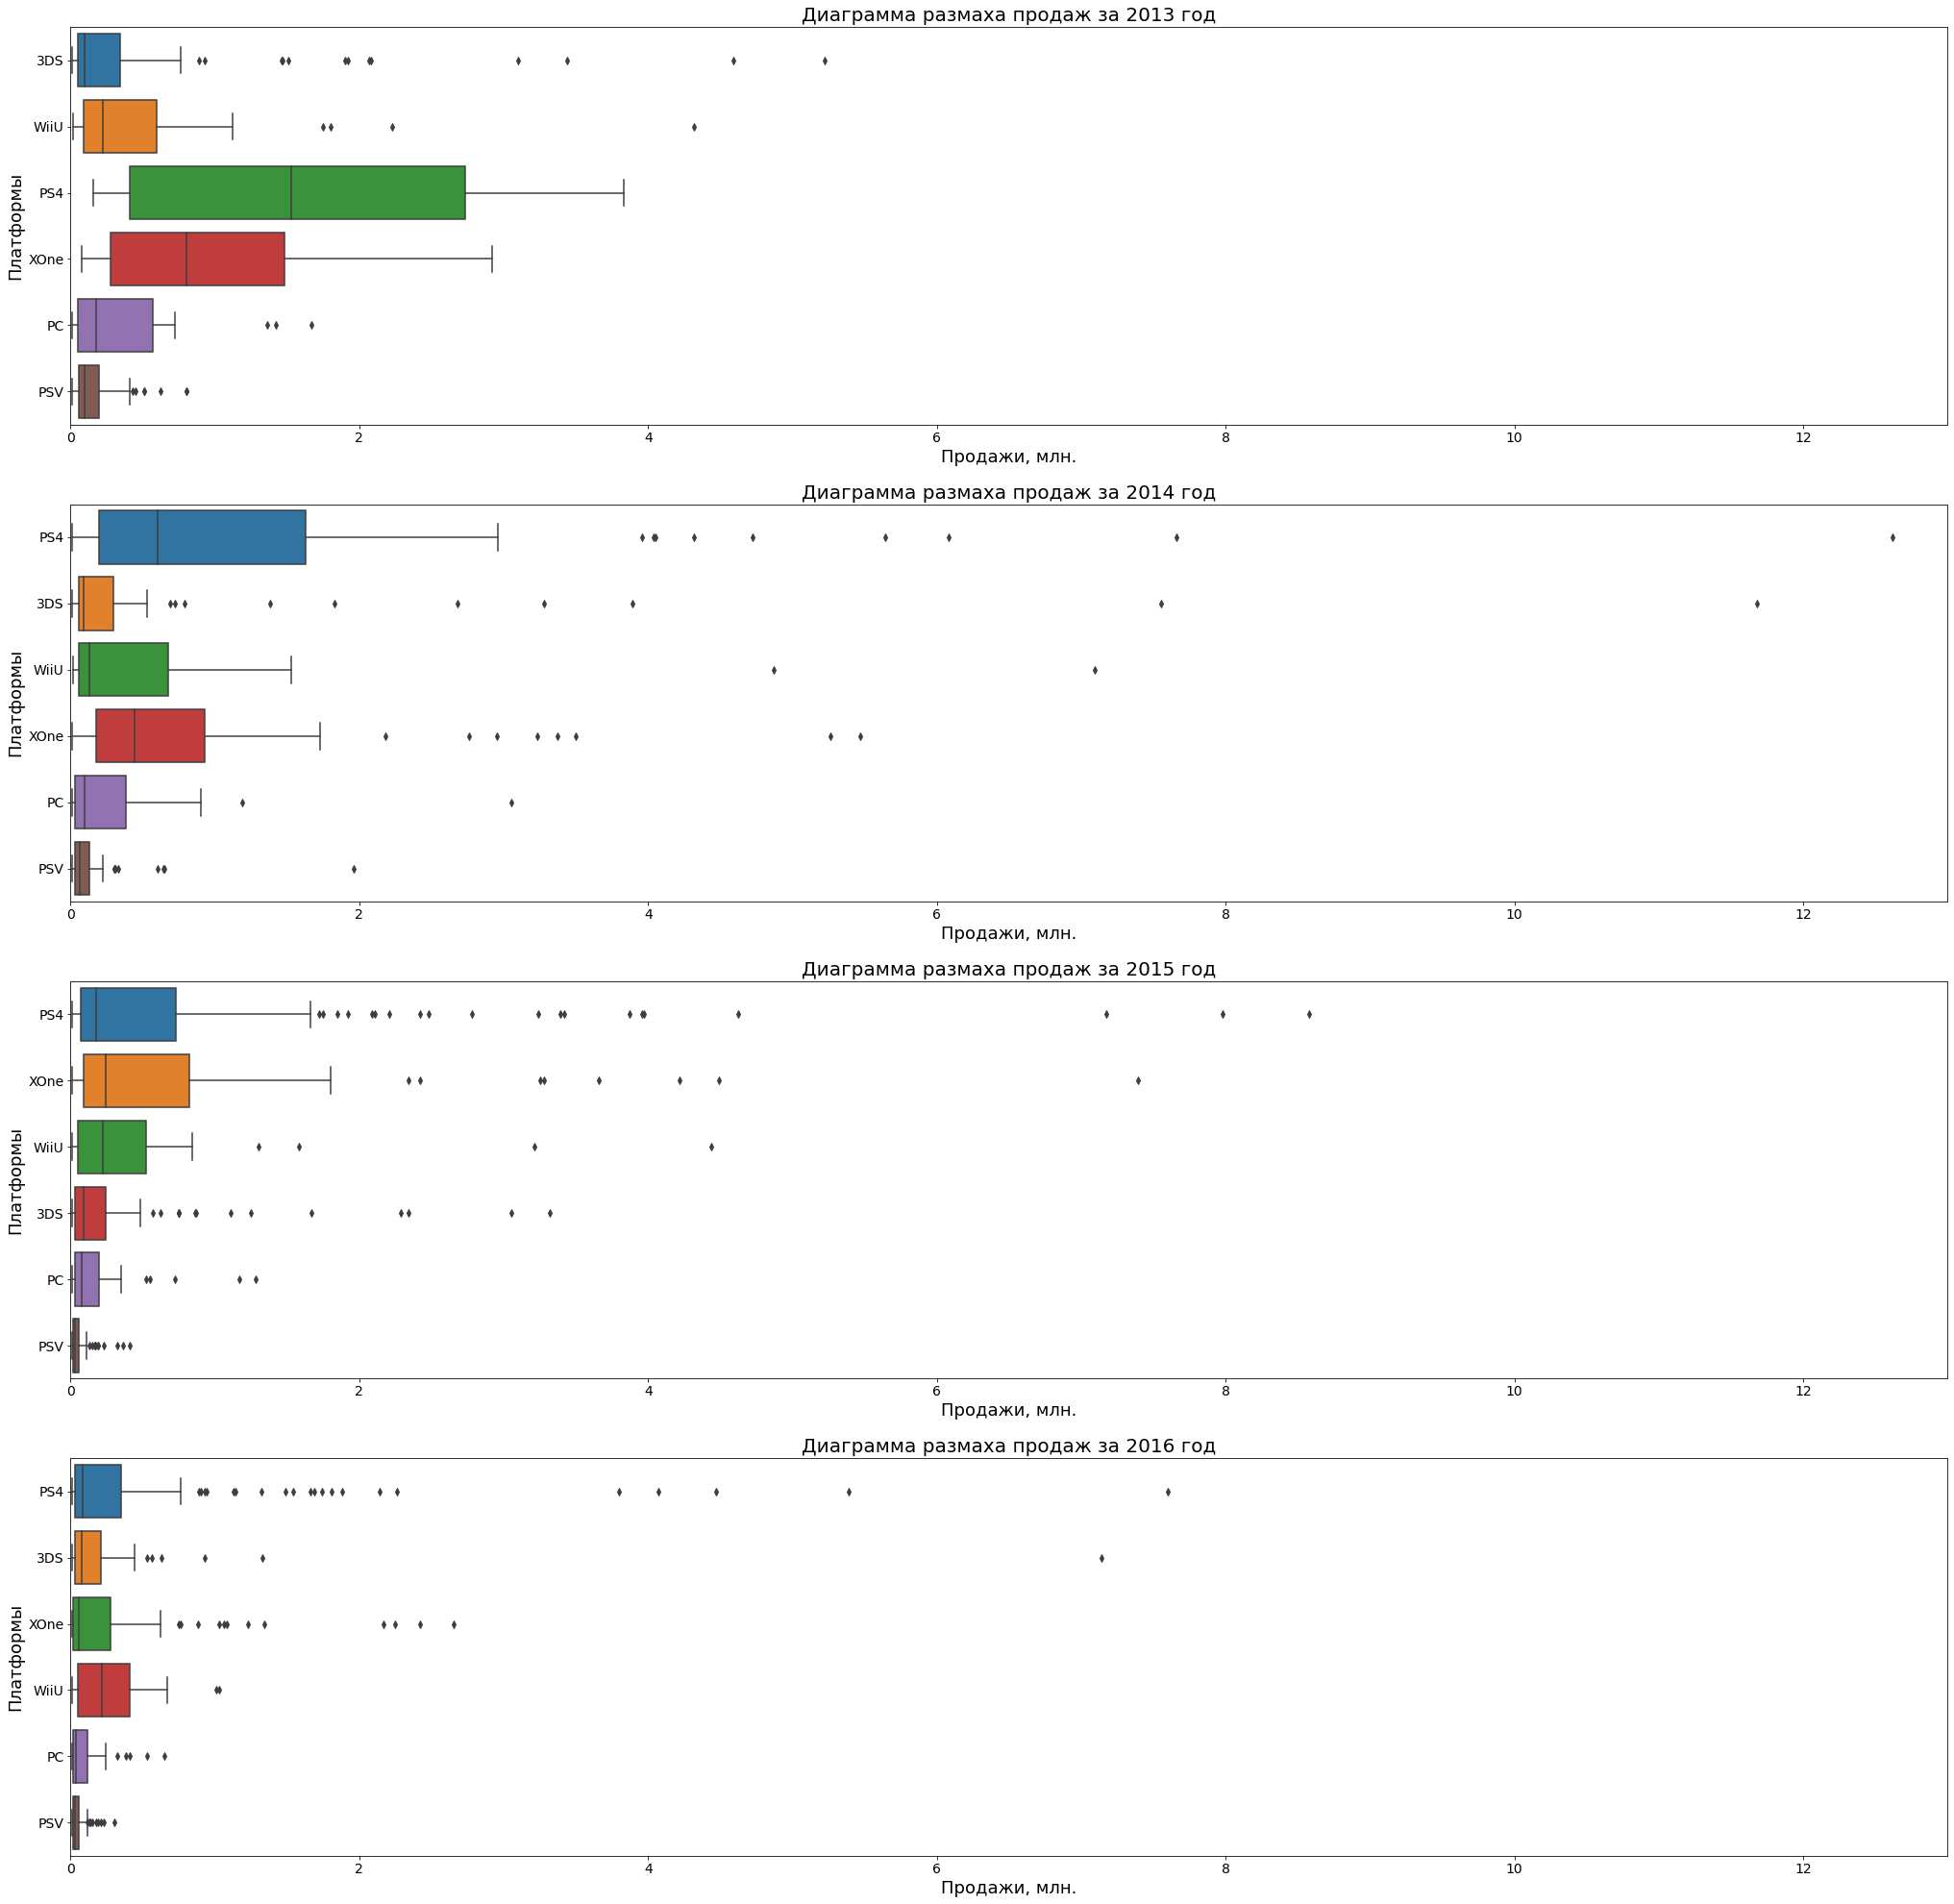

In [61]:
x = 2013
#fig = plt.figure(figsize=(30,60))
fig, ax = plt.subplots(4,1)
fig.set_size_inches(35, 35)
for n in range(4):
    #plt.subplot(6, 1, n+1)
    sns.boxplot(x="total_sales", y="platform", data = actual_df[actual_df['year_of_release']==x], ax = ax[n])
    ax[n].set_title('Диаграмма размаха продаж за ' + str(x) + ' год', fontsize=20)
    ax[n].set_xlabel('Продажи, млн.', fontsize=18)
    ax[n].set_ylabel('Платформы', fontsize=18)
    ax[n].set(xlim=(0, 13))
    ax[n].tick_params(labelsize=14)
    x += 1

Видим что за весь актуальный период(с 2013г) среднее кол-во продаж игр по современным платформам одинакого, но у PS4 больше разброс, что говорит о бОльшем кол-ве "хитов", в сравнении с другими платформами. Но прямой конкурент, Xbox, не сильно отстает. Так же построив боксплоты по годам, можно увидеть что ситуация меняется от года к году.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [62]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1604 non-null   object 
 1   platform         1604 non-null   object 
 2   year_of_release  1604 non-null   Int64  
 3   genre            1604 non-null   object 
 4   na_sales         1604 non-null   float64
 5   eu_sales         1604 non-null   float64
 6   jp_sales         1604 non-null   float64
 7   other_sales      1604 non-null   float64
 8   critic_score     788 non-null    Int64  
 9   user_score       853 non-null    float64
 10  rating           1604 non-null   object 
 11  total_sales      1604 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 230.6+ KB


In [63]:
# Функция строит графики корреляции

def cor(data, name_plat):
    ax_1 = fig.add_subplot(2,1,1)
    ax_2 = fig.add_subplot(2,1,2)
    ax_1 = data.query('platform == @name_plat').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    ax_2 = data.query('platform == @name_plat').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    ax_1.set_title('Продажи/оценки критиков ' + name_plat)
    ax_2.set_title('Продажи/оценки игроков '  + name_plat)
    ax_1.set_xlabel('Оценки критиков', fontsize=12)
    ax_1.set_ylabel('Платформы', fontsize=12)
    ax_2.set_xlabel('Оценки игроков', fontsize=12)
    ax_2.set_ylabel('Платформы', fontsize=12)
    plt.show()

In [78]:
# Возвращает коэффицент Пирсона для зависимости число продаж и оценки критиков/ползователей

def cor_num(name_plat):
    data = actual_df.query('platform == @name_plat')
    critic_corr = data['critic_score'].astype('float64').corr(data['total_sales'])
    user_corr = data['user_score'].astype('float64').corr(data['total_sales'])
    print('Зависимость продаж от оценки критиков ' + str(critic_corr.round(2)))
    print('Зависимость продаж от оценки пользователей ' + str(user_corr.round(2)))

<div class="alert alert-success">
<h2> Комментарий от ревьюера <a class="tocSkip"> </h2>

Круто, что решил завернуть решение этих задач в две функции!

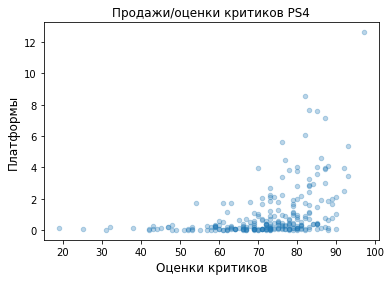

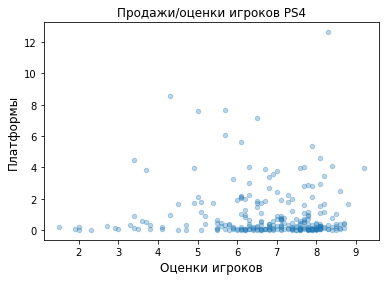

In [79]:
cor(actual_df, 'PS4')

In [80]:
cor_num('PS4')

Зависимость продаж от оценки критиков 0.41
Зависимость продаж от оценки пользователей -0.03


Видим что для пользователей PS4 оценки критиков играют большую роль при покупке игры.

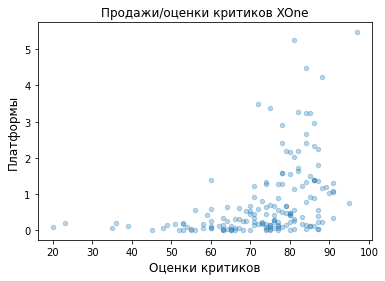

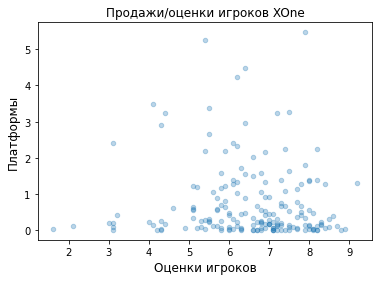

In [81]:
cor(actual_df, 'XOne')

In [82]:
cor_num('XOne')

Зависимость продаж от оценки критиков 0.42
Зависимость продаж от оценки пользователей -0.07


С XOne та же история 

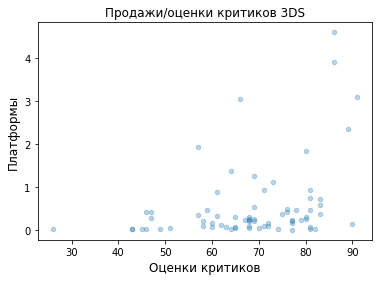

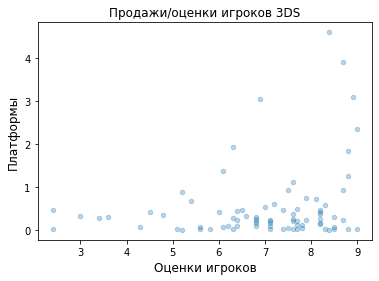

In [83]:
cor(actual_df,'3DS')

In [84]:
cor_num('3DS')

Зависимость продаж от оценки критиков 0.36
Зависимость продаж от оценки пользователей 0.24


А для пользователей 3DS значимость одного и другого сопоставима.

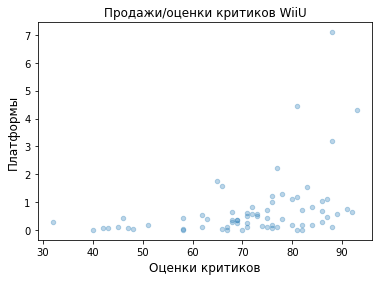

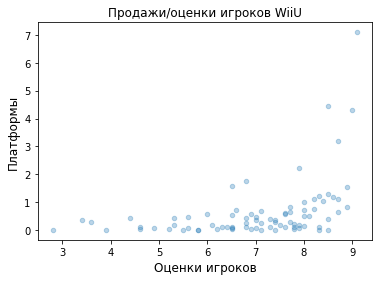

In [85]:
cor(actual_df, 'WiiU')

In [86]:
cor_num('WiiU')

Зависимость продаж от оценки критиков 0.38
Зависимость продаж от оценки пользователей 0.42


Для ползователей WiiU ситуация схожа с 3DS, но для них оценки пользователей даже важнее.

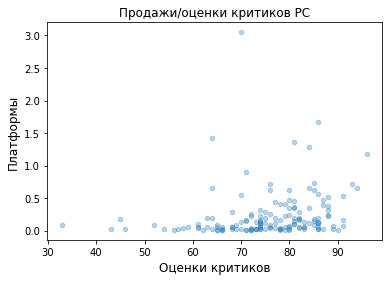

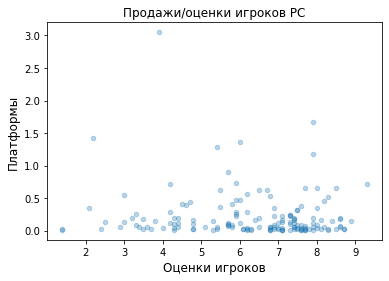

In [87]:
cor(actual_df, 'PC')

In [88]:
cor_num('PC')

Зависимость продаж от оценки критиков 0.2
Зависимость продаж от оценки пользователей -0.09


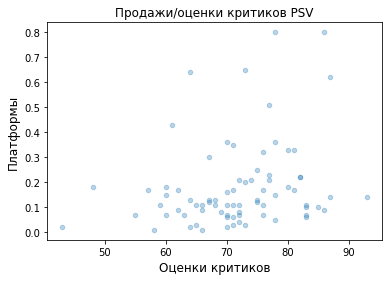

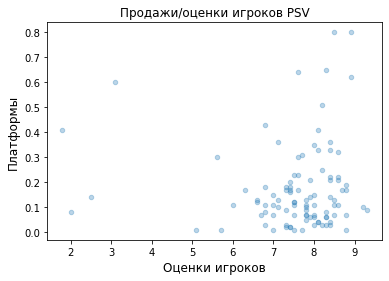

In [89]:
cor(actual_df, 'PSV')

In [90]:
cor_num('PSV')

Зависимость продаж от оценки критиков 0.25
Зависимость продаж от оценки пользователей 0.0


### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [91]:
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,no rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,no rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


In [92]:
genre = pd.pivot_table(actual_df, index = 'genre', values = 'total_sales', aggfunc = ['sum','count', 'mean']).reset_index()

In [93]:
genre.columns = ['genre', 'total_sales', 'games_count', 'mean_sales']

In [94]:
genre = genre.sort_values('total_sales', ascending = False)

Text(0, 0.5, 'Общие продажи, млн.')

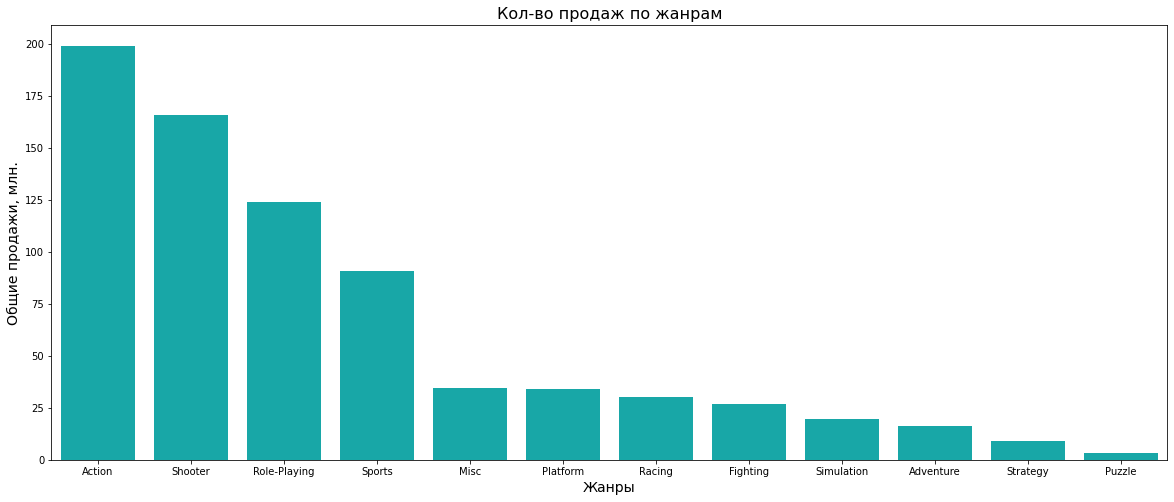

In [95]:
fig = plt.figure(figsize=(20,8))
plt.subplot()
plt.title('Кол-во продаж по жанрам', fontsize=16)
sns.barplot(x='genre',y='total_sales',data=genre, color="c")
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Общие продажи, млн.', fontsize=14)

По кол-ву продаж за актуальный период мы видим что лидируют жанры "Action", "Shooter" и "Sports". Соотнесем продажи с кол-вом выпускаемых игр в каждом жанре.

In [96]:
genre = genre.sort_values('mean_sales', ascending = False)

In [97]:
genre

,genre,total_sales,games_count,mean_sales
8,Shooter,165.71,122,1.358279
10,Sports,90.67,127,0.713937
4,Platform,34.22,55,0.622182
2,Fighting,26.69,48,0.556042
7,Role-Playing,123.94,228,0.543596
6,Racing,30.36,60,0.506000
9,Simulation,19.81,50,0.396200
0,Action,199.18,568,0.350669
3,Misc,34.66,112,0.309464
5,Puzzle,3.13,16,0.195625


Text(0, 0.5, 'Средние продажи, млн.')

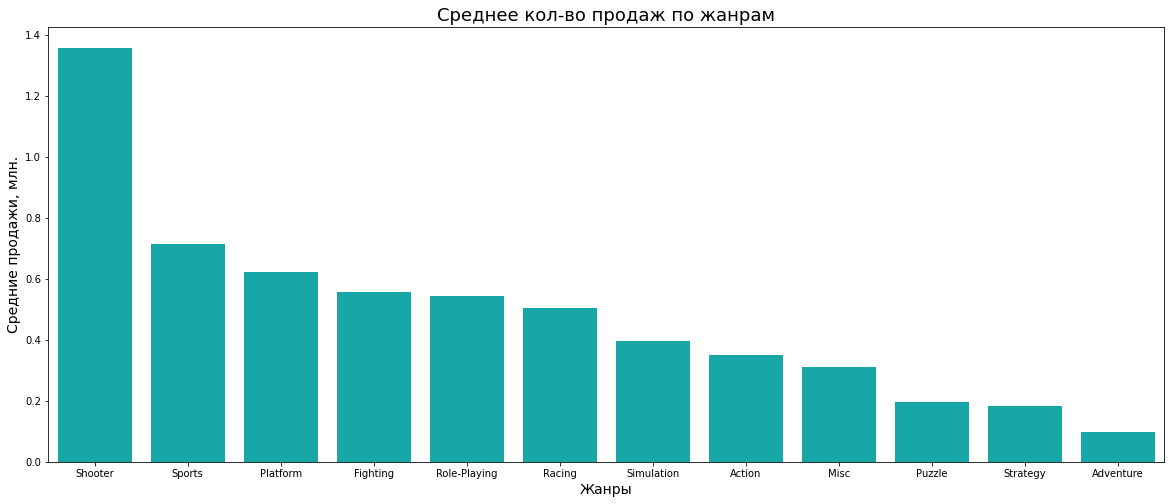

In [98]:
fig = plt.figure(figsize=(20,8))
plt.subplot()
plt.title('Среднее кол-во продаж по жанрам', fontsize=18)
sns.barplot(x='genre',y='mean_sales',data=genre, color="c")
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Средние продажи, млн.', fontsize=14)

По среднему кол-ву продаж игр каждого жанра в лидерах все так же остаются "Sports" и "Shooter", причем шутеры значительно опережают остальные жанры. А вот игры жанра "Action" в среднем берут гораздо реже. В относительных величинах этот жанр занимает лишь 5ое место. Замыкающая тройка жанров лишь поменялась местами между собой.

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишите различия в долях продаж

In [99]:
def plot_func(x):
    fig = plt.figure(figsize=(30,7))
    country = ['na_sales', 'eu_sales', 'jp_sales']
    area = ['Северная Америка', 'Европа', 'Япония']
    plt.suptitle("Продажи по регионам", fontsize = 25)
    for n in range(len(country)):
        con = country[n]
        ar = area[n]
        plt.subplot(1, 3, n+1)
        data = actual_df.pivot_table(index = x, values = con, aggfunc = 'sum').reset_index().sort_values(con, ascending = False).head()
        g = sns.barplot(x=x, y=con,data = data, color="c")
        plt.setp(g.get_xticklabels(), rotation=0)
        plt.title(ar, fontsize=16)
        plt.xlabel(x, fontsize=14)
        plt.ylabel('Продажи, млн.', fontsize=14)

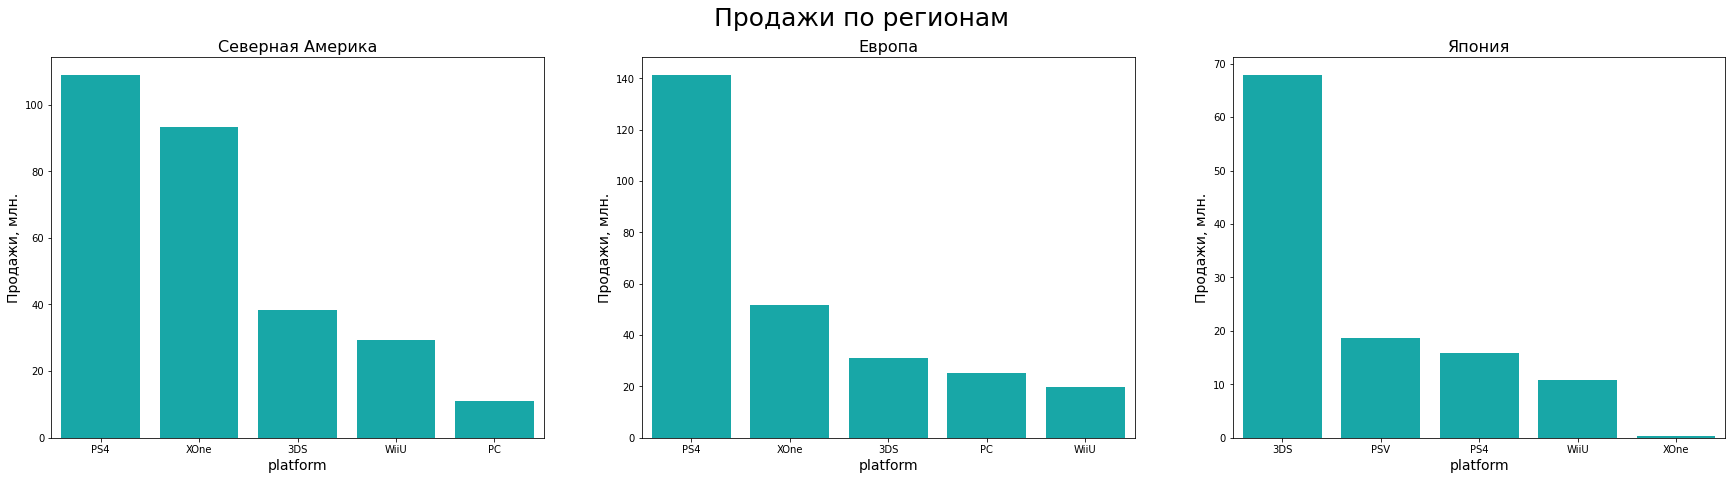

In [100]:
plot_func('platform')

In [101]:
def pie_plot(p):
    country = ['na_sales', 'eu_sales', 'jp_sales']
    area = ['Северная Америка', 'Европа', 'Япония']
    fig, ax = plt.subplots(1,3)
    fig.suptitle('Доли продаж', y = 0.66, fontsize = 20)
    for n in range(len(country)):
        x = country[n]
        ar = area[n]
        fig.set_size_inches(20, 20)
        top_platform = actual_df.pivot_table(index = p, values = x, aggfunc = 'sum').sort_values(x, ascending = False).reset_index().head()
        ax[n].pie(top_platform[x], labels=top_platform[p], autopct='%1.1f%%', shadow=True, startangle=90)
        ax[n].set_title(ar, fontsize = 15)

    plt.show()

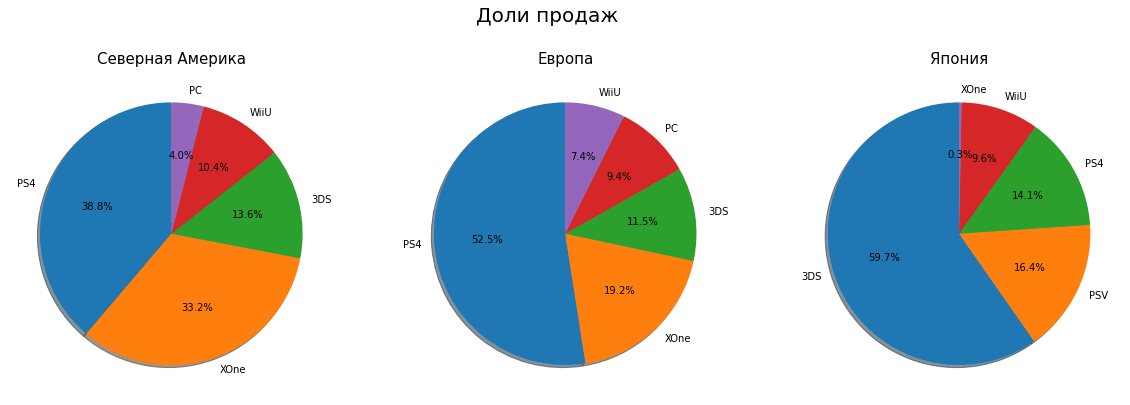

In [102]:
pie_plot('platform')

Видим что в Америке за первенство соревнуютя ИксБокс и ПС4, в европе же ПС4 безусловный лидер, в остальном распределение схоже(ПК и ВииУ поменяны местами). А на рынке Японии наблюдается совершенно иная картина: здесь безусловный лидер с долей 60% 3DS. С уверенностью можно сказать что предпочтения японцев в корне отличается от геймеров стран Европы и Америки.

### Самые популярные жанры (топ-5). Поясните разницу

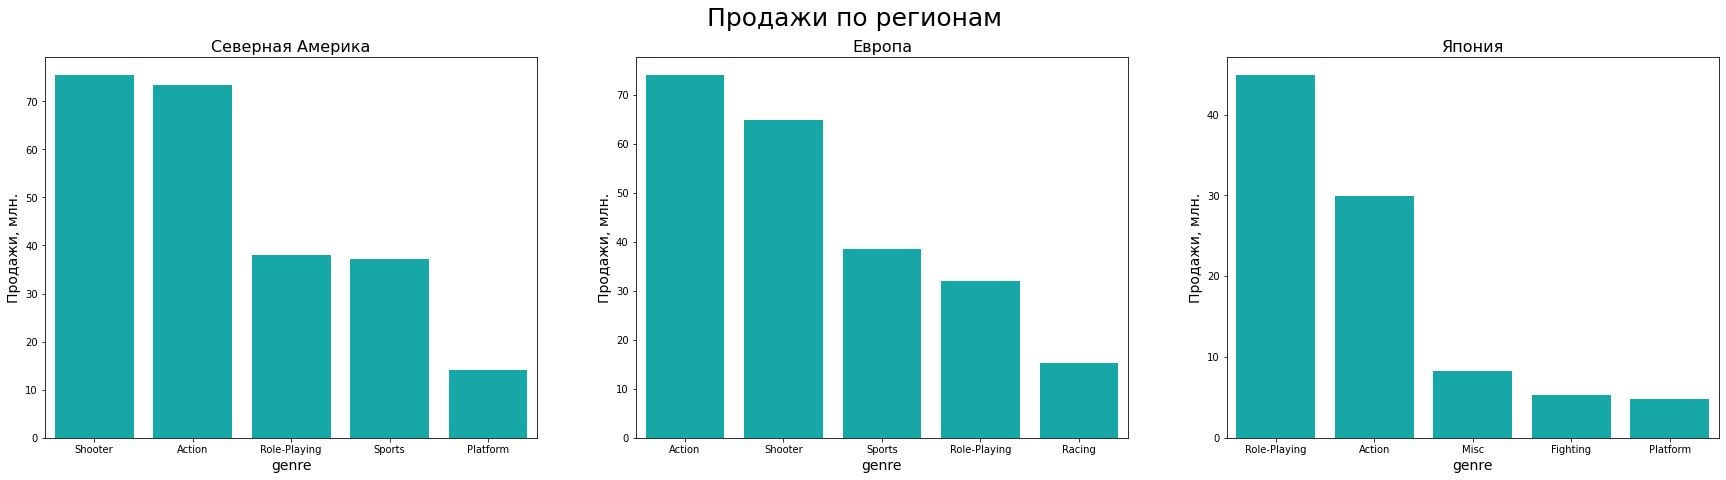

In [103]:
plot_func('genre')

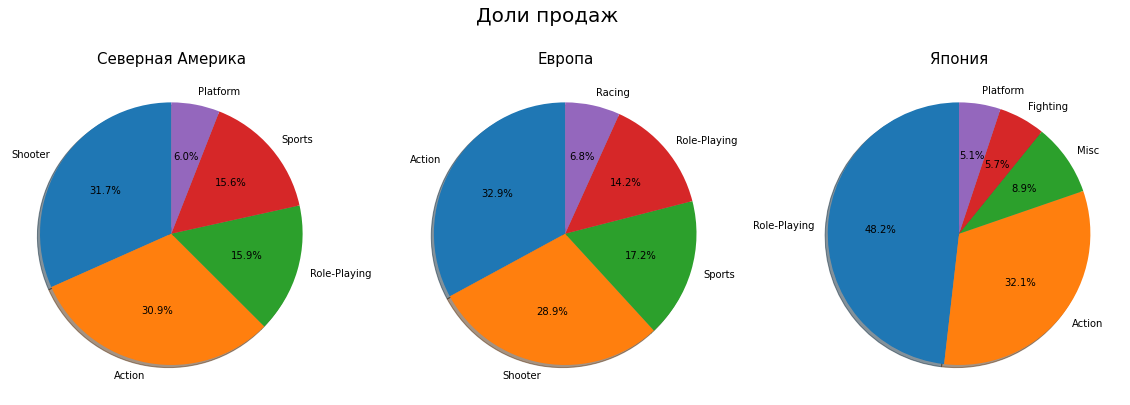

In [104]:
pie_plot('genre')

В Америке больше любят пострелять и не брезгают платформерами, в Европе предпочитают игры в жанре "Экшн" и любят иногда погонять на виртуальном треке, в остальном мы видим схожую картину. Ну а Японский геймер самобытен в своих предпочтениях. Ролевуха лидирует, жанр Экшн так же присутсвует, но тут появляются новые жанры: Музка и Файтинги 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [105]:
actual_df['rating'].value_counts()

no rating    727
M            255
T            238
E            206
E10+         178
Name: rating, dtype: int64

In [106]:
actual_df['rating'] = actual_df['rating'].replace('K-A', 'E')

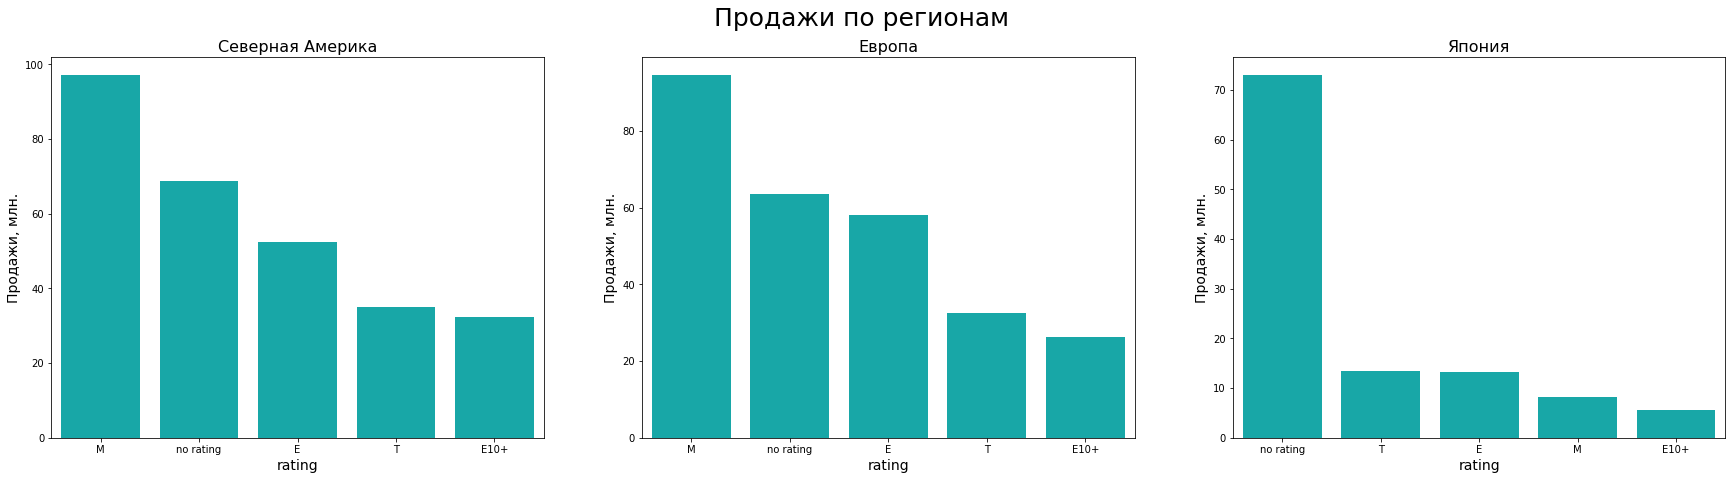

In [107]:
plot_func('rating')

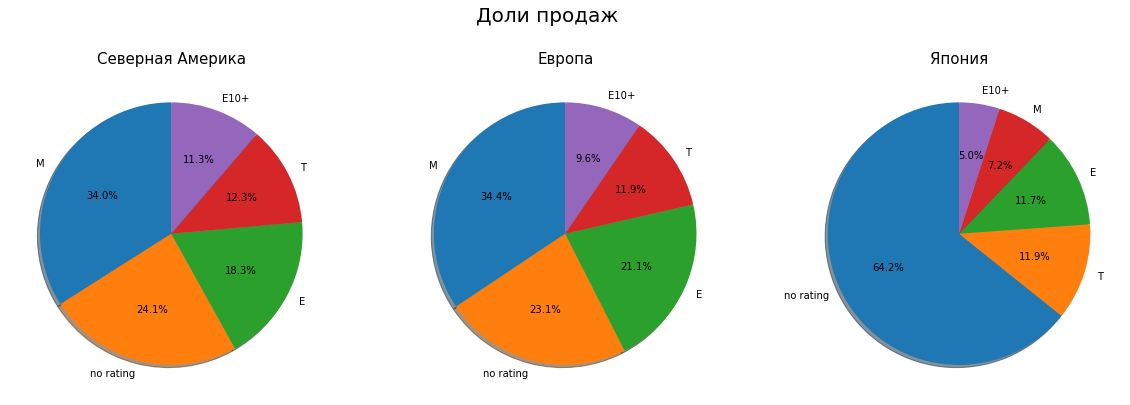

In [108]:
pie_plot('rating')

В Северной Америке, Европе и Японии разные системы возрастных рейтингов, а в нашем датасете представлена только Америкаская. Так как предпочтения игроков в Америке и Европе схожи, то и игры и распределение рейтингов выглядит так же, тогда как в японии мы видим что большинство игр "no rating" и мы можем предположить что это результат того что японские геймеры предпочитают отчественного производителя игр.

Вообщем можно заключить что средний геймер что в европе что в америке интересуется тем же и покупает одно и то же, в отличии от японского геймера

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [126]:
actual_df = actual_df[actual_df['user_score'].isna()==False]

In [127]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 42 to 16690
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             853 non-null    object 
 1   platform         853 non-null    object 
 2   year_of_release  853 non-null    Int64  
 3   genre            853 non-null    object 
 4   na_sales         853 non-null    float64
 5   eu_sales         853 non-null    float64
 6   jp_sales         853 non-null    float64
 7   other_sales      853 non-null    float64
 8   critic_score     774 non-null    Int64  
 9   user_score       853 non-null    float64
 10  rating           853 non-null    object 
 11  total_sales      853 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 88.3+ KB


Проверим распределения рейтингов для 2ух платформ на нормальность.

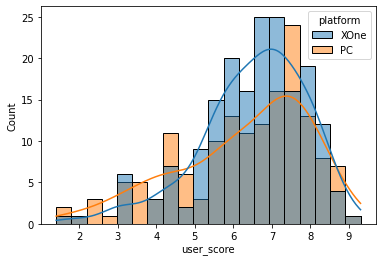

In [138]:
sns.histplot(data = actual_df.query('platform == "XOne" or platform == "PC"'), x = "user_score", kde=True, hue = 'platform', bins = 20)
plt.show()

In [129]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(actual_df.query('platform == "XOne"')['user_score']))

Shapiro-Wilk normality test, W-statistic: 0.955055, p-value: 0.000015


In [130]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(actual_df.query('platform == "PC"')['user_score']))

Shapiro-Wilk normality test, W-statistic: 0.941600, p-value: 0.000005


Видим что значения распределены ненормально.

Применяем непараметрический тест Манна-Уитни. Проведем двустороннюю проверку.

<div>
Выдвинем следующие гипотезы:
<ul>
<li>Н0 - средние рейтинги для двух платформ одинаковые</li>
<li>Н1 - средние рейтинги отличаются</li>
</ul>
</div>

In [131]:
alpha = 0.05


In [132]:
results = st.mannwhitneyu(actual_df.query('platform == "PC"')['user_score'], actual_df.query('platform == "XOne"')['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5011006734622374
Не получилось отвергнуть нулевую гипотезу


Приходим к выводу что средние пользовательские реййтинги на платформах XBox и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим распределения рейтингов для 2ух жанров на нормальность.

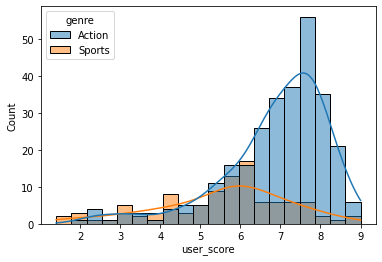

In [139]:
sns.histplot(data = actual_df.query('genre == "Action" or genre == "Sports"'), x = "user_score", kde=True, hue = 'genre', bins = 20)
plt.show()

In [134]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(actual_df.query('genre == "Action"')['user_score']))

Shapiro-Wilk normality test, W-statistic: 0.893111, p-value: 0.000000


In [135]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(actual_df.query('genre == "Sports"')['user_score']))

Shapiro-Wilk normality test, W-statistic: 0.969533, p-value: 0.019418


Видим что значения распределены ненормально.

Проводим двустороннюю проверку

<div>
Выдвинем следующие гипотезы:
<ul>
<li>Н0 - средние рейтинги для двух жанров одинаковые</li>
<li>Н1 - средние рейтинги отличаются</li>
</ul>
</div>

In [136]:
results = st.mannwhitneyu(actual_df.query('genre == "Action"')['user_score'], actual_df.query('genre == "Sports"')['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.6749927101630694e-14
Отвергаем нулевую гипотезу


<div>
Проведем одностороннюю проверку и выдвинем следующие гипотезы:
<ul>
<li>Н0 - средние рейтинги для двух жанров одинаковые</li>
<li>Н1 - средний рейтинг для жанра "Экшн" больше</li>
</ul>
</div>

In [137]:
results = st.mannwhitneyu(actual_df.query('genre == "Action"')['user_score'], actual_df.query('genre == "Sports"')['user_score'], alternative='greater')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.374963550815347e-15
Отвергаем нулевую гипотезу


Вывод: пользовательский рейтинг для игр жанра "Экшн" выше чем у игр жанра "Спорт"

## Общий вывод

### Северная Америка и Европа 

Проанализировав данные можно сделать следующие выводы:

Рекламная стратегия для рынков Северной Америки и Европы может строиться очень похоже, за тем исключением что в Америке в топ-5 входит жанр "Platform", а в Европе - "Racing". Так же стоит обратить внимание что в Европе PS4 более популярна, тогда как в Америке Xbox и PS4 представлены в равных долях.

Топ-5 платформ:
  - PS4
  - XOne
  - WiiU
  - 3DS
  - PC

Топ-5 жанров:
  - Action
  - Shooter
  - Sports
  - Role-Playing
  - Platform/Racing

### Япония

Рынок Японии в занчительной степени отличается. В плане игр и платформ предпочтение стоит отдавать локальным производителям. Жанровые предпочтения японцев так же отличаются от Европейского и Американского рынка.

Топ-5 платформ:
  - 3DS
  - PSV
  - PS4
  - WiiU
  - XOne(Почти не представлен)

Первые 2 платформы занимают около 75% рынка и являются портативными консолями.

ПК гейминг так же не пользуется популярностью в Японии.

Топ-5 жанров:
  - Role-Playing
  - Action
  - Music
  - Fighting
  - Platform

Причем на первые два жанра приходится 80% рынка видеоигр.